## Evaluating Regression Models

Do you work for this exercise in either a jupyter notebook named `evaluate` within the regression directory. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within the regression directory.

## 1
Load the tips dataset from either pydataset or seaborn.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:
```python
from statsmodels.formula.api import ols
model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)
```
The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.



In [38]:
#select variables
df = tips[['total_bill', 'tip']]
#change column names
df.columns = ['x', 'y']
df.head()

,x,y
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [57]:
#ignore warnings 
import warnings
warnings.filterwarnings("ignore")
#estatablish a bsaseline
df['y_bl']= df.y.mean() 
df.head()

,x,y,y_bl,y_hat
0,16.99,1.01,2.998279,2.704636
1,10.34,1.66,2.998279,2.006223
2,21.01,3.50,2.998279,3.126835
3,23.68,3.31,2.998279,3.407250
4,24.59,3.61,2.998279,3.502822


In [58]:
#create model predictions
from statsmodels.formula.api import ols
model = ols('y ~ x', data=df).fit()
df['y_hat'] = model.predict(df.x)
df.head()

,x,y,y_bl,y_hat
0,16.99,1.01,2.998279,2.704636
1,10.34,1.66,2.998279,2.006223
2,21.01,3.50,2.998279,3.126835
3,23.68,3.31,2.998279,3.407250
4,24.59,3.61,2.998279,3.502822


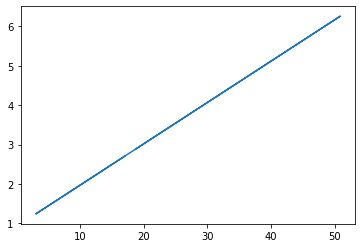

In [19]:
#visualize the regression line
plt.plot(df.x, df.y_hat)

## 3
Plot the residuals for the linear regression model that you made.

In [59]:
df['residuals'] = df.y - df.y_hat
df.head()

,x,y,y_bl,y_hat,residuals
0,16.99,1.01,2.998279,2.704636,-1.694636
1,10.34,1.66,2.998279,2.006223,-0.346223
2,21.01,3.50,2.998279,3.126835,0.373165
3,23.68,3.31,2.998279,3.407250,-0.097250
4,24.59,3.61,2.998279,3.502822,0.107178


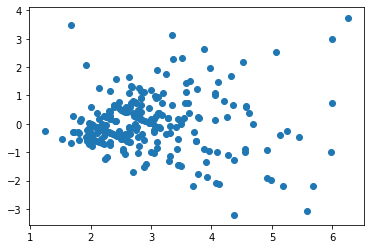

In [60]:
plt.scatter(df.y_hat, df.residuals)

## 4
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [22]:
# import mean_squared_error function to calcuate SSE, ESS, TSS, MSE, RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE = mean_squared_error(df.y, df.y_hat)
SSE = mean_squared_error(df.y, df.y_hat)*len(df)
RMSE = sqrt(mean_squared_error(df.y, df.y_hat))
ESS = sum((df.y_hat - df.y.mean())**2)
TSS = SSE + ESS

In [ ]:
ss = pd.DataFrame({'metrics': np.array(['SSE', 'ESS', 'TSS', 'MSE', 'RMSE'])})

In [36]:
ss['value'] = np.array([SSE, ESS, TSS, MSE, RMSE])

In [37]:
ss

,metrics,value
0,SSE,252.788744
1,ESS,212.423733
2,TSS,465.212477
3,MSE,1.036019
4,RMSE,1.017850


## 5
Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [45]:
#calcuate SSE, MSE, RMSE
SSE_bl = mean_squared_error(df.y, df.y_bl)*len(df)
MSE_bl = mean_squared_error(df.y, df.y_bl)
RMSE_bl = sqrt(mean_squared_error(df.y, df.y_bl))

In [101]:
bl = pd.DataFrame({'metrics': np.array(['SSE_bl', 'MSE_bl', 'RMSE_bl']), 
                  'value': np.array([SSE_bl, MSE_bl, RMSE_bl])})
bl

,metrics,value
0,SSE_bl,465.212477
1,MSE_bl,1.906609
2,RMSE_bl,1.380800


## 6
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [48]:
if SSE < SSE_bl:
    print("model performs better than the baseline model")
else:
    print("model not performs better than the baseline model")

model performs better than the baseline model


## 7
What is the amount of variance explained in your model?

In [49]:
#import explained_variance_score from sklearn libary
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(df.y, df.y_hat)
evs

0.4566165863516767

In [51]:
#alternative way 
r2 = model.rsquared
r2

0.45661658635167646

## 8 
Is your model significantly better than the baseline model?

In [55]:
f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval, ", the mode is significantly better than the baseline model")

p-value for model significance =  6.692470646863376e-34 , the mode is significantly better than the baseline model


## 9
Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

In [61]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    plt.scatter(y_hat, residuals)

- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def regression_errors(y, y_hat):
    MSE = mean_squared_error(y, y_hat)
    SSE = mean_squared_error(y, y_hat)*len(y)
    RMSE = sqrt(mean_squared_error(y, y_hat))
    ESS = sum((y_hat - y.mean())**2)
    TSS = SSE + ESS
    return SSE, ESS, TSS, MSE, RMSE

In [76]:
#validate
regression_errors(df.y, df.y_hat)

(252.788743850776,
 212.4237331984042,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [91]:
from sklearn.metrics import mean_squared_error
def baseline_mean_errors(y):
    y_bl = df.y + df.y.mean() -df.y
    SSE = mean_squared_error(y, y_bl)*len(y)
    MSE = mean_squared_error(y, y_bl)
    RMSE = sqrt(mean_squared_error(y, y_bl))
    return SSE, MSE, RMSE

In [90]:
# make a single value to a series of the same values
y_bl = df.y + df.y.mean() -df.y
y_bl

0      2.998279
1      2.998279
2      2.998279
3      2.998279
4      2.998279
         ...   
239    2.998279
240    2.998279
241    2.998279
242    2.998279
243    2.998279
Name: y, Length: 244, dtype: float64

In [92]:
# validate
baseline_mean_errors(df.y)

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [93]:
def better_than_baseline(y, yhat):
    y_bl = y + y.mean() - y
    RMSE_bl = sqrt(mean_squared_error(y, y_bl))
    RMSE = sqrt(mean_squared_error(y, df.y_hat))
    return RMSE < RMSE_bl
    

In [94]:
#validate
better_than_baseline(df.y, df.y_hat)

True

- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [95]:
def model_significance(ols_model):
    r2 = ols_model.rsquared
    p_val = ols_models.f_pvalue
    return r2, p_val

## 10
Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [100]:
import pydataset
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df = mpg[[]]